## Vizualization

In [4]:
#import related libraries

import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import json
import waterfall_chart

#-----------------------------------
import warnings
warnings.filterwarnings("ignore")

In [5]:
# download data
data = pd.read_csv(r'processed_data.csv')
data.event_created_date = pd.to_datetime(data.event_created_date)

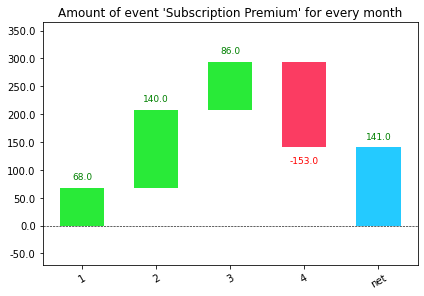

In [6]:
df = pd.DataFrame(data.query("event_name == 'Subscription Premium'").groupby(['month'], as_index=False).agg('count')[["month", "event_name"]])
df['Delta'] = np.nan

# Calculate the delta by subtracting each value from the previous value
df['Delta'] = df['event_name'].diff()

# Replace the first NaN value with the original value
df.at[0, 'Delta'] = df.at[0, 'event_name']
df.month = df.month.astype('str')

waterfall_chart.plot(df.month, df.Delta)
plt.title("Amount of event 'Subscription Premium' for every month")
plt.show()

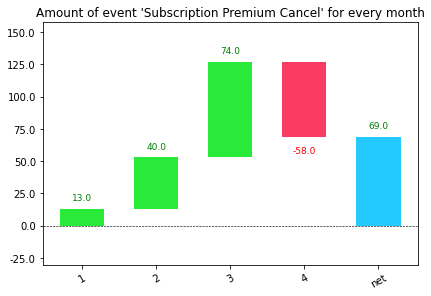

In [7]:
df = pd.DataFrame(data.query("event_name == 'Subscription Premium Cancel'").groupby(['month'], as_index=False).agg('count')[["month", "event_name"]])
df['Delta'] = np.nan

# Calculate the delta by subtracting each value from the previous value
df['Delta'] = df['event_name'].diff()

# Replace the first NaN value with the original value
df.at[0, 'Delta'] = df.at[0, 'event_name']
df.month = df.month.astype('str')

waterfall_chart.plot(df.month, df.Delta)
plt.title("Amount of event 'Subscription Premium Cancel' for every month")
plt.show()

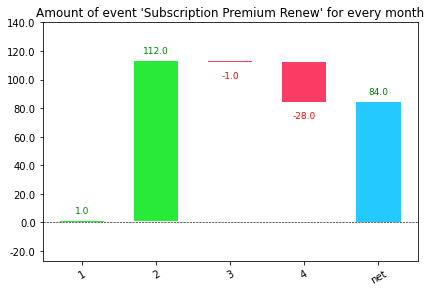

In [8]:
df = pd.DataFrame(data.query("event_name == 'Subscription Premium Renew'").groupby(['month'], as_index=False).agg('count')[["month", "event_name"]])
df['Delta'] = np.nan

# Calculate the delta by subtracting each value from the previous value
df['Delta'] = df['event_name'].diff()

# Replace the first NaN value with the original value
df.at[0, 'Delta'] = df.at[0, 'event_name']
df.month = df.month.astype('str')

waterfall_chart.plot(df.month, df.Delta)
plt.title("Amount of event 'Subscription Premium Renew' for every month")
plt.show()

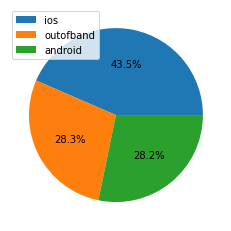

In [9]:
plt.pie(data.event_platform.value_counts(), autopct='%.1f%%')
plt.legend(loc = 'upper left', labels = ['ios', 'outofband', 'android'])
plt.show()

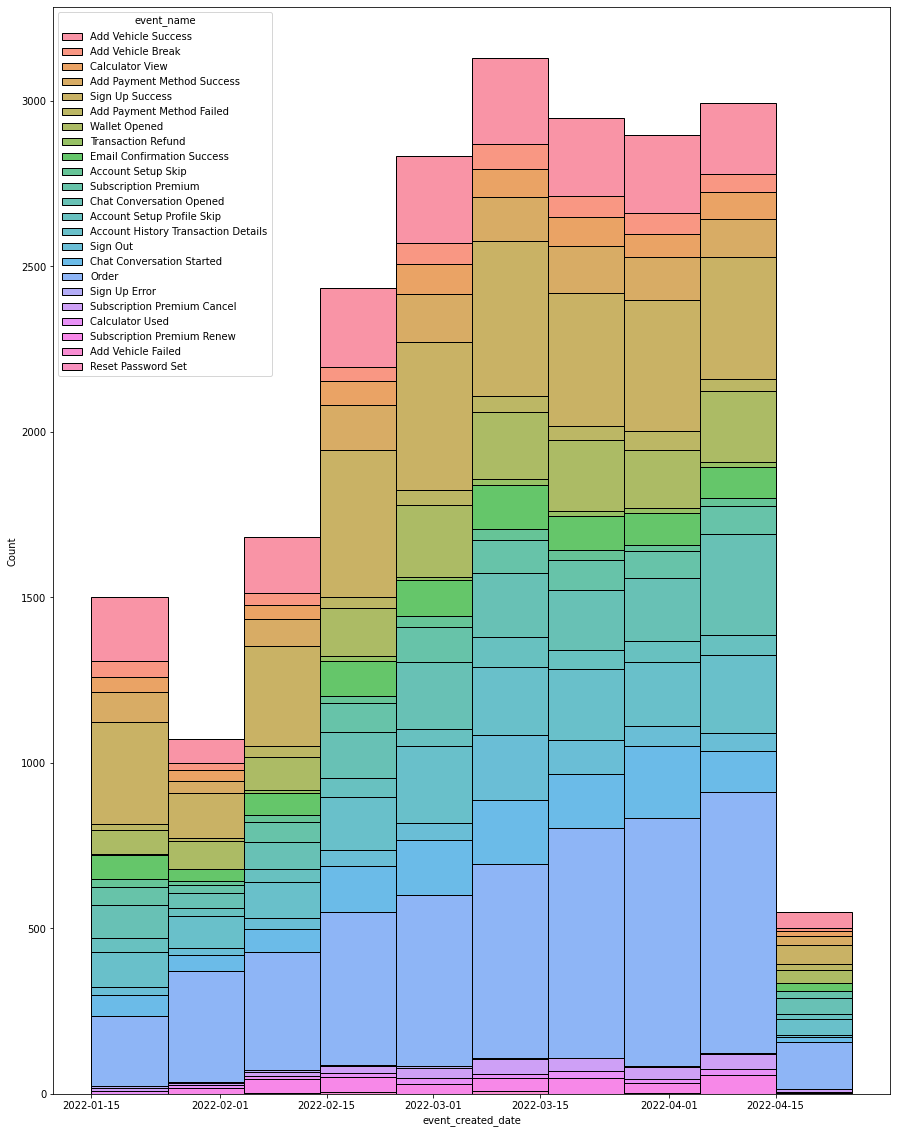

In [10]:
plt.figure(figsize = (15,20))
sns.histplot(data = data, x = 'event_created_date' , hue = "event_name",binwidth=10,multiple = "stack")
plt.show()

We can see that activity falls after March

## Working with event attributes

In [11]:
event_attributes = data.event_attributes.to_list()
for attribute in range(len(event_attributes)):
    event_attributes[attribute] = json.loads(event_attributes[attribute])
event_attributes = pd.DataFrame(event_attributes)

In [12]:
event_attributes.head(10)

,Make,Model,Color,Year,Temporary,Start Date,End Date,Rental state,Payment Method,Tokenized Pay,...,Type,Navigated From,Status,Transaction type,Premium Membership,Description,Google Map Installed,Selected Route Type,Transaction Type,Promo code
0,Dodge,Caravan,White,2019,false,,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Credit,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ford,F-150,Black,2017,false,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
event_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22039 entries, 0 to 22038
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  1923 non-null   object
 1   Model                 1923 non-null   object
 2   Color                 1923 non-null   object
 3   Year                  1923 non-null   object
 4   Temporary             1923 non-null   object
 5   Start Date            1775 non-null   object
 6   End Date              754 non-null    object
 7   Rental state          151 non-null    object
 8   Payment Method        1372 non-null   object
 9   Tokenized Pay         881 non-null    object
 10  Method                3355 non-null   object
 11  Rental State          603 non-null    object
 12  Error Code            355 non-null    object
 13  Error Message         355 non-null    object
 14  Id                    102 non-null    object
 15  Amount                102 non-null  

We can see that near 95% of table is empty

In [14]:
data_cancel = data.query("event_name == 'Subscription Premium Cancel'")
event_attributes_for_cancel = data_cancel.event_attributes.to_list()
for attribute in range(len(event_attributes_for_cancel)):
    event_attributes_for_cancel[attribute] = json.loads(event_attributes_for_cancel[attribute])
event_attributes_for_cancel = pd.DataFrame(event_attributes_for_cancel)
event_attributes_for_cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Empty DataFrame


We can see that we have no event attributes when user cancels premium, so that will be a good decision to set data in event_attributes in that cases to analyze event_attributes and start steps for user returning

In [15]:
data.query("event_attributes == '{}'").event_name.value_counts()

Wallet Opened                  1471
Chat Conversation Started      1201
Calculator View                 620
Add Vehicle Break               486
Email Confirmation Success      285
Subscription Premium Cancel     262
Account Setup Skip              222
Calculator Used                  94
Chat Conversation Opened         26
Reset Password Set                1
Name: event_name, dtype: int64

In [16]:
data.event_name.value_counts()

Order                                  4845
Sign Up Success                        3329
Add Vehicle Success                    1923
Account History Transaction Details    1607
Chat Conversation Opened               1485
Wallet Opened                          1471
Chat Conversation Started              1201
Add Payment Method Success             1038
Email Confirmation Success              832
Subscription Premium                    711
Calculator View                         620
Sign Out                                595
Account Setup Profile Skip              498
Add Vehicle Break                       486
Add Payment Method Failed               334
Subscription Premium Renew              310
Subscription Premium Cancel             262
Account Setup Skip                      222
Calculator Used                         120
Transaction Refund                      102
Sign Up Error                            26
Add Vehicle Failed                       21
Reset Password Set              

We can see that we have 4668 rows with empty event attributes, and frequently empty event_attributes have common event_name

In [17]:
event_attributes["Premium Membership"].value_counts()

True     4357
False     488
Name: Premium Membership, dtype: int64

In [18]:
data_copy_1 = copy.deepcopy(data)

In [19]:
data_copy_1['prem_memb'] = event_attributes["Premium Membership"]

In [20]:
data_copy_1.prem_memb.value_counts()

True     4357
False     488
Name: prem_memb, dtype: int64

In [21]:
def values_agg(series):
    return series.dropna().values

data_copy_1 = data_copy_1.groupby(['userid']).agg({'event_name' :values_agg, 'prem_memb': values_agg})
subscription_cancel = 'Subscription Premium Cancel'
data_copy_1.event_name = data_copy_1.event_name.apply(lambda x: subscription_cancel in x)
data_copy_1.query('event_name == True').prem_memb.value_counts()

[True]                                        35
[False]                                        5
[]                                             1
[]                                             1
[]                                             1
                                              ..
[]                                             1
[True, True]                                   1
[]                                             1
[True, True, True, True, True, True, True]     1
[]                                             1
Name: prem_memb, Length: 213, dtype: int64

We can see that in dataset too small number of data, so in cases where subscription was cancelled, premium membership event_attribute didn't changed

### Interim findings
We can say that most operations are from IOS devices, the most activity is in February and March, but amount of data os catastrophically low to say something about influence of event_attributes

[See notebook Event_sequences_tests]